# Data Modeling and Analysis

This Notebook will model the data and gather insights. This will include:
- Data Exploration
- Data Visualization
- Conclusions


Notes to self:


## Import Data

In [1]:
## Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from datetime import datetime

## Sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

## NLTK
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

## WordCloud
from wordcloud import WordCloud

#Ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('../3_ANALYSIS/data/processed_data.csv')

print(df.shape)
df.head()

(3735, 78)


,subreddit,selftext,title,link_flair_richtext,subreddit_name_prefixed,upvote_ratio,ups,score,edited,is_self,...,domain_self.army,domain_self.bipolar,domain_self.schizophrenia,domain_stripes.com,domain_thearmorylife.com,domain_v.redd.it,domain_youtu.be,domain_youtube.com,hour_of_day,day_of_week
0,Army,This was a convo I had with one of my buddies ...,If you could create a new MRE based on a Fast ...,[],r/army,0.666290,-0.237698,-0.237698,0,1,...,1,0,0,0,0,0,0,0,23,5
1,Army,BLUF: how do you overcome imposter syndrome?\n...,how do you even Army?,[],r/army,-1.563819,-0.263742,-0.263742,0,1,...,1,0,0,0,0,0,0,0,23,5
2,Army,"Long story short, my estranged (soon to be ex)...",Command Directed No-Contact Order?,[],r/army,0.666290,-0.250720,-0.250720,0,1,...,1,0,0,0,0,0,0,0,23,5
3,Army,"\nMy husband is 35T, and just graduated AIT. W...",Anyone 35T?,[],r/army,-0.163518,-0.224675,-0.224675,0,1,...,1,0,0,0,0,0,0,0,22,5
4,Army,I could use some advice on going recruiting. I...,Thinking of going recruiter as brand new E5,[],r/army,0.666290,-0.250720,-0.250720,0,1,...,1,0,0,0,0,0,0,0,22,5


In [3]:
military_df = df[df['subreddit'].isin(['Army', 'USMC'])]

military_df.head()

,subreddit,selftext,title,link_flair_richtext,subreddit_name_prefixed,upvote_ratio,ups,score,edited,is_self,...,domain_self.army,domain_self.bipolar,domain_self.schizophrenia,domain_stripes.com,domain_thearmorylife.com,domain_v.redd.it,domain_youtu.be,domain_youtube.com,hour_of_day,day_of_week
0,Army,This was a convo I had with one of my buddies ...,If you could create a new MRE based on a Fast ...,[],r/army,0.666290,-0.237698,-0.237698,0,1,...,1,0,0,0,0,0,0,0,23,5
1,Army,BLUF: how do you overcome imposter syndrome?\n...,how do you even Army?,[],r/army,-1.563819,-0.263742,-0.263742,0,1,...,1,0,0,0,0,0,0,0,23,5
2,Army,"Long story short, my estranged (soon to be ex)...",Command Directed No-Contact Order?,[],r/army,0.666290,-0.250720,-0.250720,0,1,...,1,0,0,0,0,0,0,0,23,5
3,Army,"\nMy husband is 35T, and just graduated AIT. W...",Anyone 35T?,[],r/army,-0.163518,-0.224675,-0.224675,0,1,...,1,0,0,0,0,0,0,0,22,5
4,Army,I could use some advice on going recruiting. I...,Thinking of going recruiter as brand new E5,[],r/army,0.666290,-0.250720,-0.250720,0,1,...,1,0,0,0,0,0,0,0,22,5


In [4]:
#Downloading NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kyerafrancis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kyerafrancis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
def preprocess_text(text):
    '''
    This function is performing text cleaning in order to prepare the text for NLP analysis.
    This includes:
    - Lowercasing
    - Removing special characters and digits
    - Tokenizing into words
    - Removing stopwords
    - Lemmatization
    
    Returns: Cleaned text
    
    '''
    # Lowercasing
    text = text.lower()
    # Remove special characters and digits
    text = re.sub("(\\d|\\W)+", " ", text)
    # Tokenize into words
    words = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words("english", "ascii"))
    words = [word for word in words if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)


In [6]:
def prepare_data_for_nlp(df, text_column='selftext', target_column='subreddit'):
    ''' 
    This function is performing text preprocessing and vectorization for NLP analysis.
    
    Parameters:
    - df: dataframe
    - text_column: column containing text data
    - target_column: column containing target variable
    
    
    Returns: X_train_vect, X_test_vect, y_train, y_test, vectorizer
    '''
    # Preprocess text data
    df[text_column] = df[text_column].apply(lambda x: preprocess_text(str(x)))

    # Split dataset into features and target variable
    X = df[text_column]
    y = df[target_column]

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Vectorization - using TF-IDF
    vectorizer = TfidfVectorizer(max_features=5000)
    X_train_vect = vectorizer.fit_transform(X_train)
    X_test_vect = vectorizer.transform(X_test)

    return X_train_vect, X_test_vect, y_train, y_test, vectorizer

In [7]:
X_train, X_test, y_train, y_test, vectorizer = prepare_data_for_nlp(military_df)

### Reviewing Aggregate Word Cloud

In [8]:
tdidf_df = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out())
print(tdidf_df)

       _a  _flu  _pubs  _req  _ss  _to_   aa  aaffj  aam  aams  ...  younger  \
0     0.0   0.0    0.0   0.0  0.0   0.0  0.0    0.0  0.0   0.0  ...      0.0   
1     0.0   0.0    0.0   0.0  0.0   0.0  0.0    0.0  0.0   0.0  ...      0.0   
2     0.0   0.0    0.0   0.0  0.0   0.0  0.0    0.0  0.0   0.0  ...      0.0   
3     0.0   0.0    0.0   0.0  0.0   0.0  0.0    0.0  0.0   0.0  ...      0.0   
4     0.0   0.0    0.0   0.0  0.0   0.0  0.0    0.0  0.0   0.0  ...      0.0   
...   ...   ...    ...   ...  ...   ...  ...    ...  ...   ...  ...      ...   
1490  0.0   0.0    0.0   0.0  0.0   0.0  0.0    0.0  0.0   0.0  ...      0.0   
1491  0.0   0.0    0.0   0.0  0.0   0.0  0.0    0.0  0.0   0.0  ...      0.0   
1492  0.0   0.0    0.0   0.0  0.0   0.0  0.0    0.0  0.0   0.0  ...      0.0   
1493  0.0   0.0    0.0   0.0  0.0   0.0  0.0    0.0  0.0   0.0  ...      0.0   
1494  0.0   0.0    0.0   0.0  0.0   0.0  0.0    0.0  0.0   0.0  ...      0.0   

      youre  youtu  youtube   yr  yuma 

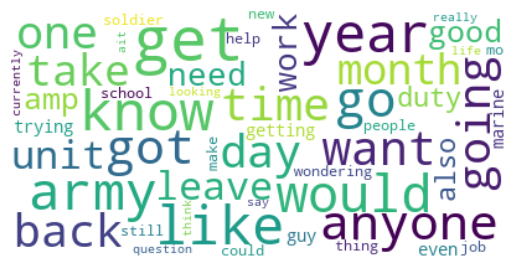

In [9]:
# Sum the TF-IDF scores for each word
word_frequencies = tdidf_df.sum(axis=0).to_dict()

# Generate WordCloud
wordcloud = WordCloud(background_color='white', max_words=50, max_font_size=50, random_state=42).generate_from_frequencies(word_frequencies)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Training for Logistical Regression Model

In [10]:
# Initialize the model
lrg = LogisticRegression()

# Train the model
lrg.fit(X_train, y_train)


LogisticRegression()

              precision    recall  f1-score   support

        Army       0.77      0.99      0.86       276
        USMC       0.88      0.14      0.25        98

    accuracy                           0.77       374
   macro avg       0.82      0.57      0.55       374
weighted avg       0.79      0.77      0.70       374



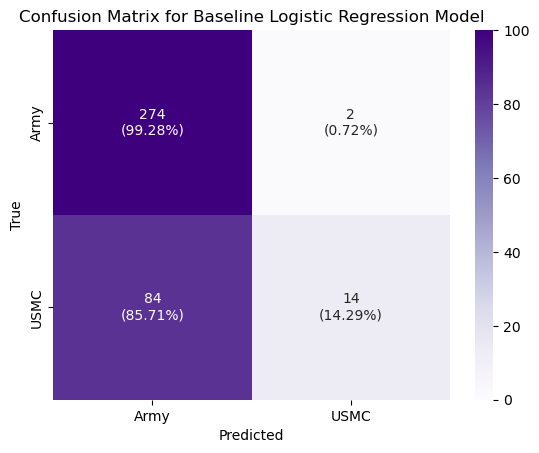

In [11]:

# Make predictions on the test set
y_pred_lr = lrg.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_lr)) #Ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html


#Export classification report to CSV
report = classification_report(y_test, y_pred_lr, output_dict=True)
# Convert the report to a DataFrame
report_df = pd.DataFrame(report)
# Save the DataFrame to a CSV file
report_df.to_csv('../4_CONCLUSIONS_VIZ/files/classification_report_base_lr.csv')



# Confusion matrix calculation
cm_lrg = confusion_matrix(y_test, y_pred_lr)

# Convert confusion matrix to percentages
cm_lr_percent = cm_lrg / cm_lrg.sum(axis=1).reshape(-1,1) * 100

# Create combined matrix with counts and percentages
combined_cm_lr = np.array([["{}\n({:.2f}%)".format(count, percent) for count, percent in zip(row_count, row_percent)] 
                        for row_count, row_percent in zip(cm_lrg, cm_lr_percent)]) #REF: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea


# Plot confusion matrix
sns.heatmap(cm_lrg,
            annot=combined_cm_lr,
            fmt='',
            cmap='Purples',
            xticklabels=['Army', 'USMC'],
            yticklabels=['Army', 'USMC'],
            vmin=0,
            vmax=100,)
plt.title('Confusion Matrix for Baseline Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [12]:
# Define parameter grid for GridSearch
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l2', 'elasticnet', None],
    'max_iter': [100, 200, 300],
    'class_weight': ['balanced', None],
    'random_state': [42],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'n_jobs': [-1]}

# Initialize Grid Search
grid_search = GridSearchCV(LogisticRegression(),
                           param_grid,
                           cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Re-evaluate with the best parameters
best_model = grid_search.best_estimator_
y_pred_best_lr = best_model.predict(X_test)


/Users/kyerafrancis/anaconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kyerafrancis/anaconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

In [13]:
# Print best parameters
print(pd.Series(grid_search.best_params_))
print()
# Print classification report
print(classification_report(y_test, y_pred_best_lr))


#Export classification report to CSV
report = classification_report(y_test, y_pred_best_lr, output_dict=True)
# Convert the report to a DataFrame
report_df = pd.DataFrame(report)
# Save the DataFrame to a CSV file
report_df.to_csv('../4_CONCLUSIONS_VIZ/files/classification_report_best_lr.csv')


# Confusion matrix calculation
cm_lrg = confusion_matrix(y_test, y_pred_best_lr)

# Convert confusion matrix to percentages
cm_lr_best_percent = cm_lrg_best / cm_lrg_best.sum(axis=1).reshape(-1,1) * 100

# Create combined matrix with counts and percentages
combined_cm_lr_best = np.array([["{}\n({:.2f}%)".format(count, percent) for count, percent in zip(row_count, row_percent)] 
                        for row_count, row_percent in zip(cm_lrg_best, cm_lr_best_percent)]) #REF: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

# Plot confusion matrix
cm_lrg_best = confusion_matrix(y_test, y_pred_best_lr)
sns.heatmap(cm_lrg_best,
            annot=combined_cm_lr_best,
            fmt='', 
            cmap='Purples',
            xticklabels=['Army', 'USMC'],
            yticklabels=['Army', 'USMC'],
            vmin=0,
            vmax=100)
plt.title('Confusion Matrix for Best Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

C                       0.1
class_weight           None
max_iter                100
multi_class     multinomial
n_jobs                   -1
penalty                None
random_state             42
solver                lbfgs
dtype: object

              precision    recall  f1-score   support

        Army       0.86      0.91      0.88       276
        USMC       0.70      0.58      0.63        98

    accuracy                           0.82       374
   macro avg       0.78      0.75      0.76       374
weighted avg       0.82      0.82      0.82       374



NameError: name 'cm_lrg_best' is not defined

In [ ]:
# Variables 
feature_names = vectorizer.get_feature_names_out()
coefficients = lrg.coef_[0] #Becuase this is a binary classification problem, there are only 2 classes. Therefore, we only need to look at the first row of coefficients.

for _, class_label in enumerate(lrg.classes_): #Ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    sorted_indices = np.argsort(coefficients)

    top_positive_words = [feature_names[i] for i in sorted_indices[-20:]]
    top_negative_words = [feature_names[i] for i in sorted_indices[:20]]

    print(f"Class: {class_label}")
    print("Top Positive Influential Words:", top_positive_words)
    print("Top Negative Influential Words:", top_negative_words)
    print()

Class: Army
Top Positive Influential Words: ['www', 'plank', 'http', 'fleet', 'cpl', 'like', 'com', 'think', 'device', 'speak', 'one', 'story', 'semper', 'issued', 'guy', 'work', 'devil', 'corp', 'usmc', 'marine']
Top Negative Influential Words: ['army', 'soldier', 'ait', 'job', 'fort', 'get', 'trying', 'station', 'date', 'basic', 'mo', 'going', 'year', 'possible', 'help', 'guard', 'two', 'day', 'someone', 'airborne']

Class: USMC
Top Positive Influential Words: ['www', 'plank', 'http', 'fleet', 'cpl', 'like', 'com', 'think', 'device', 'speak', 'one', 'story', 'semper', 'issued', 'guy', 'work', 'devil', 'corp', 'usmc', 'marine']
Top Negative Influential Words: ['army', 'soldier', 'ait', 'job', 'fort', 'get', 'trying', 'station', 'date', 'basic', 'mo', 'going', 'year', 'possible', 'help', 'guard', 'two', 'day', 'someone', 'airborne']



### Word Clouds for Positive and Negative Posts

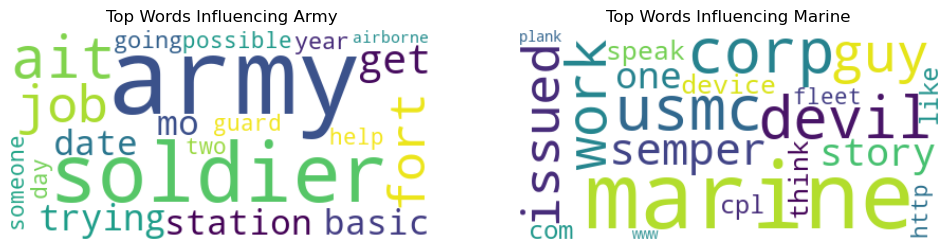

In [ ]:
# For Class A (Positive Coefficients)
top_words_marine = {feature_names[i]: abs(coefficients[i]) for i in sorted_indices[-20:]}

# For Class B (Negative Coefficients)
top_words_army = {feature_names[i]: abs(coefficients[i]) for i in sorted_indices[:20]}

# Word Cloud for Class A
wordcloud_army = WordCloud(background_color='white').generate_from_frequencies(top_words_army)

# Word Cloud for Class B
wordcloud_marine = WordCloud(background_color='white').generate_from_frequencies(top_words_marine)

# Display Word Clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_army, interpolation='bilinear')
plt.title('Top Words Influencing Army')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_marine, interpolation='bilinear')
plt.title('Top Words Influencing Marine')
plt.axis("off")

plt.show()

## Training for Naive Bayes Regression Model

In [ ]:
# Initialize and train the Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

              precision    recall  f1-score   support

        Army       0.74      1.00      0.85       253
        USMC       1.00      0.02      0.04        90

    accuracy                           0.74       343
   macro avg       0.87      0.51      0.45       343
weighted avg       0.81      0.74      0.64       343



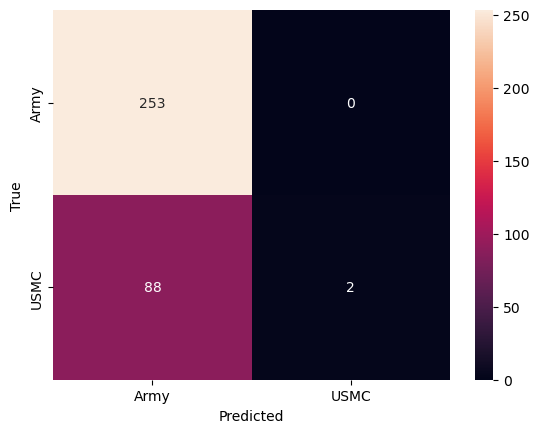

In [ ]:
# Predict on the test set
y_pred_mnb = mnb.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_mnb))

# Plot the confusion matrix
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
sns.heatmap(cm_mnb,
            annot=True,
            fmt='d',
            xticklabels=['Army', 'USMC'],
            yticklabels=['Army', 'USMC'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Define a parameter grid for GridSearch
param_grid_mnb = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'fit_prior': [True, False],
    'class_prior': [None, [0.5, 0.5], [0.3, 0.7], [0.7, 0.3]],
    }

# Initialize and perform the grid search
grid_search_mnb = GridSearchCV(MultinomialNB(), param_grid = param_grid_mnb, cv=5)
grid_search_mnb.fit(X_train, y_train)



# Re-evaluate using the best model
best_model = grid_search_mnb.best_estimator_
y_pred_best_mnb = best_model.predict(X_test)


Best Parameters:  {'C': 0.1, 'class_weight': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': -1, 'penalty': None, 'random_state': 42, 'solver': 'lbfgs'}
              precision    recall  f1-score   support

        Army       0.80      0.96      0.87       253
        USMC       0.76      0.32      0.45        90

    accuracy                           0.80       343
   macro avg       0.78      0.64      0.66       343
weighted avg       0.79      0.80      0.76       343



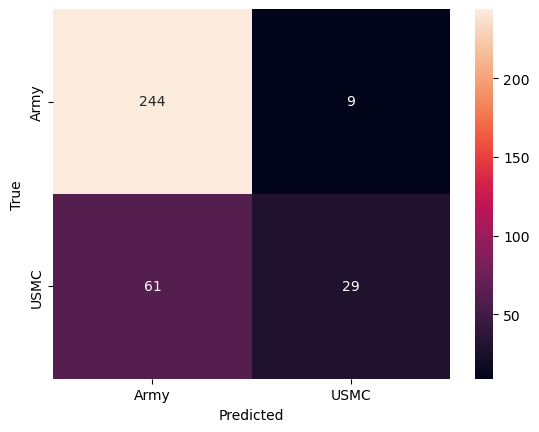

In [ ]:
# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

#Print classification report
print(classification_report(y_test, y_pred_best_mnb))

# Plot the confusion matrix
cm_mnb_best = confusion_matrix(y_test, y_pred_best_mnb)
sns.heatmap(cm_mnb_best,
            annot=True,
            fmt='d',
            xticklabels=['Army', 'USMC'],
            yticklabels=['Army', 'USMC'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
# Variables 

log_prob = mnb.feature_log_prob_ #There are no coefficients in Multinomial Naive Bayes, instead we have log probabilities

for _, class_label in enumerate(mnb.classes_):
    class_log_probabilities = log_prob[_]
    sorted_indices = np.argsort(class_log_probabilities)

    top_words = [feature_names[i] for i in sorted_indices[-20:]]  # Top 20 words

    print(f"Class: {class_label}")
    print("Top Influential Words:", top_words)
    print()

Class: Army
Top Influential Words: ['also', 'need', 'duty', 'back', 'unit', 'got', 'take', 'one', 'time', 'anyone', 'day', 'going', 'want', 'go', 'would', 'like', 'know', 'year', 'army', 'get']

Class: USMC
Top Influential Words: ['order', 'time', 'think', 'good', 'corp', 'want', 'back', 'year', 'go', 'guy', 'amp', 'work', 'get', 'got', 'would', 'know', 'anyone', 'one', 'like', 'marine']



## Training for Random Forest Classifier Model

In [ ]:
# Train the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

        Army       0.80      0.98      0.88       253
        USMC       0.87      0.30      0.45        90

    accuracy                           0.80       343
   macro avg       0.83      0.64      0.66       343
weighted avg       0.82      0.80      0.77       343



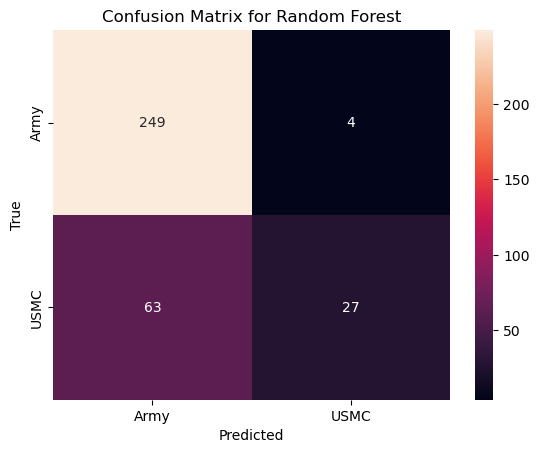

In [ ]:
# Make predictions
y_pred_rf = rf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_rf))

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', xticklabels=['Army', 'USMC'], yticklabels=['Army', 'USMC'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)[-20:]  # Top 20 features (Not separated by class)

top_features = [(feature_names[i], importances[i]) for i in indices]
print("Top Features and Words:")
for feature, importance in top_features:
    print(f"{feature}: {importance}")

Top Features and Words:
take: 0.003888333665428546
speak: 0.0039389972599733975
like: 0.00436517810439417
guy: 0.004466530546966081
work: 0.004573985886332688
think: 0.004620895427342969
story: 0.004752527815736131
said: 0.004975037982854045
got: 0.005068670222511856
cpl: 0.005454608289968344
semper: 0.005732239892561181
com: 0.0059139762792351815
order: 0.006021300270907281
get: 0.006402605045465101
one: 0.007994399685526486
devil: 0.010187199754234304
usmc: 0.010416650481652311
corp: 0.010999111333465001
army: 0.014435871912056236
marine: 0.046391767865627126


In [ ]:
# Define parameter grid for GridSearch
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Re-evaluate with the best parameters
best_model_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_model_rf.predict(X_test)

max_depth             NaN
min_samples_leaf      1.0
min_samples_split    10.0
n_estimators         10.0
dtype: float64

              precision    recall  f1-score   support

        Army       0.80      0.98      0.88       253
        USMC       0.82      0.31      0.45        90

    accuracy                           0.80       343
   macro avg       0.81      0.64      0.67       343
weighted avg       0.81      0.80      0.77       343



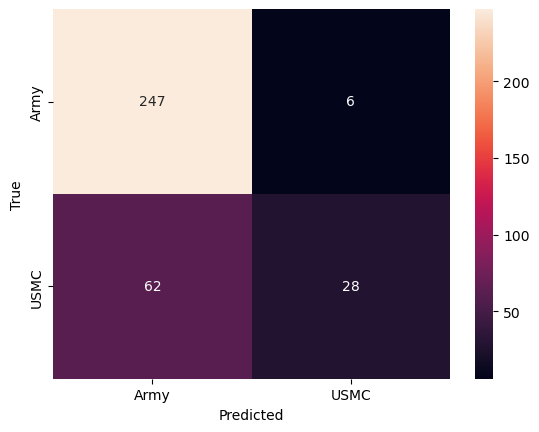

In [ ]:
# Print best parameters
print(pd.Series(grid_search_rf.best_params_))
print()
# Print classification report
print(classification_report(y_test, y_pred_best_rf))

# Plot confusion matrix
cm_rf_best = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(cm_rf_best,
            annot=True,
            fmt='d', 
            xticklabels=['Army', 'USMC'],
            yticklabels=['Army', 'USMC'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Training for KNN Model

In [ ]:
# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

        Army       0.74      1.00      0.85       253
        USMC       0.00      0.00      0.00        90

    accuracy                           0.74       343
   macro avg       0.37      0.50      0.42       343
weighted avg       0.54      0.74      0.63       343



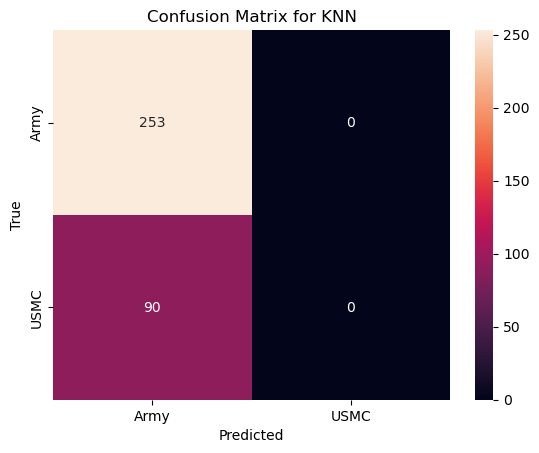

As you can see if we process the KNN the same way as the other models, we get a very low accuracy score. This is because the KNN model is very sensitive to the scale of the data. We will need to scale the data before we can run the model.


In [ ]:

# Make predictions
y_pred_knn = knn.predict(X_test) 

# Print classification report
print(classification_report(y_test, y_pred_knn))

# Confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', xticklabels=['Army', 'USMC'], yticklabels=['Army', 'USMC'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print('As you can see if we process the KNN the same way as the other models, we get a very low accuracy score. This is because the KNN model is very sensitive to the scale of the data. We will need to scale the data before we can run the model.')

In [ ]:
# Scale the features
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN model with GridSearch for parameter tuning
knn_params = {
    'n_neighbors': np.arange(1, 25),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_scaled = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn_scaled, knn_params, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_scaled, y_train)

# Best KNN model
best_knn = grid_search.best_estimator_

metric         euclidean
n_neighbors            8
weights         distance
dtype: object

Classification Report:
              precision    recall  f1-score   support

        Army       0.86      0.86      0.86       253
        USMC       0.61      0.62      0.62        90

    accuracy                           0.80       343
   macro avg       0.74      0.74      0.74       343
weighted avg       0.80      0.80      0.80       343

Accuracy: 0.7959183673469388


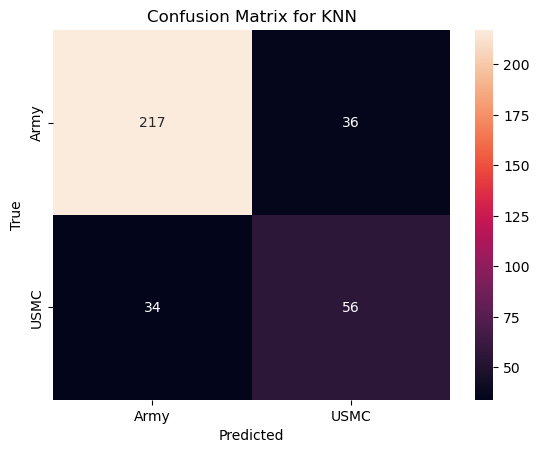

In [ ]:
# Make predictions
y_pred_knn = best_knn.predict(X_test_scaled)

# Print best parameters
print(pd.Series(grid_search_knn.best_params_))
print()
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

# Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', xticklabels=['Army', 'USMC'], yticklabels=['Army', 'USMC'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Training for Gradient Boosting Model

In [ ]:
# Initialize and train the Gradient Boosting model
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

              precision    recall  f1-score   support

        Army       0.80      0.98      0.88       253
        USMC       0.85      0.31      0.46        90

    accuracy                           0.80       343
   macro avg       0.82      0.65      0.67       343
weighted avg       0.81      0.80      0.77       343



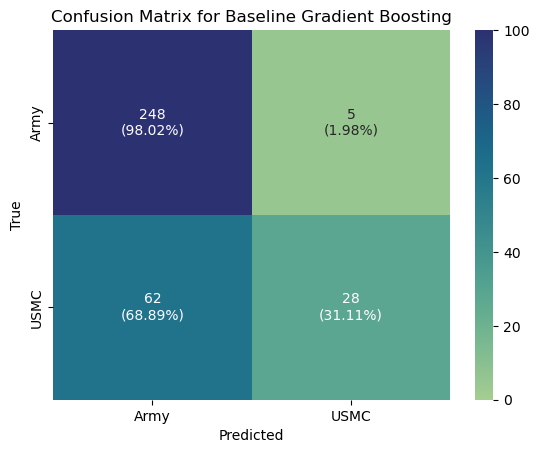

In [ ]:
# Make predictions
y_pred_gb = gb.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_gb))


#Export classification report to CSV
report = classification_report(y_test, y_pred_gb, output_dict=True)
# Convert the report to a DataFrame
report_df = pd.DataFrame(report)
# Save the DataFrame to a CSV file
report_df.to_csv('../4_CONCLUSIONS_VIZ/files/classification_report_base_gb.csv')

# Confusion matrix calculation
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Convert confusion matrix to percentages
cm_gb_percent = cm_gb / cm_gb.sum(axis=1).reshape(-1,1) * 100

# Create combined matrix with counts and percentages
combined_cm = np.array([["{}\n({:.2f}%)".format(count, percent) for count, percent in zip(row_count, row_percent)] 
                        for row_count, row_percent in zip(cm_gb, cm_gb_percent)]) #REF: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea


# Confusion matrix for Gradient Boosting

sns.heatmap(cm_gb, annot=combined_cm, fmt='', cmap='crest', xticklabels=['Army', 'USMC'], yticklabels=['Army', 'USMC'], vmin=0, vmax=100,)
plt.title('Confusion Matrix for Baseline Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show() 

In [ ]:
# Variables

importances_gb = gb.feature_importances_
indices_gb = np.argsort(importances_gb)[-20:]  # Top 20 features

top_features_gb = [(feature_names[i], importances_gb[i]) for i in indices_gb]
print("Top Features and Words for Gradient Boosting:")
for feature, importance in top_features_gb:
    print(f"{feature}: {importance}")

Top Features and Words for Gradient Boosting:
looking: 0.007909464627233636
oki: 0.008213839103075654
boy: 0.008347857711018916
take: 0.008486119279966385
air: 0.00919838608957183
speak: 0.010123101105384873
semper: 0.01036800474085591
drug: 0.010720317779771279
soldier: 0.012821527317117744
device: 0.012924373818444645
cpl: 0.013397954689263582
ait: 0.013675053126159038
fleet: 0.01568303494849866
pendleton: 0.01579991600253302
one: 0.018267339140417498
usmc: 0.02147998622525014
com: 0.023441373259880778
devil: 0.03364222384920879
army: 0.12087777307330615
marine: 0.2502657472830982


In [ ]:
# Define parameter grid for GridSearch
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Initialize Grid Search
grid_search_gb = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid_gb, cv=5)
grid_search_gb.fit(X_train, y_train)

# Re-evaluate with the best parameters
best_model_gb = grid_search_gb.best_estimator_
y_pred_best_gb = best_model_gb.predict(X_test)

Best Parameters for Gradient Boosting:
learning_rate          0.1
max_depth              5.0
min_samples_leaf       2.0
min_samples_split      4.0
n_estimators         100.0
dtype: float64

Classification Report for Best Gradient Boosting Model:
              precision    recall  f1-score   support

        Army       0.81      0.98      0.88       253
        USMC       0.86      0.33      0.48        90

    accuracy                           0.81       343
   macro avg       0.83      0.66      0.68       343
weighted avg       0.82      0.81      0.78       343



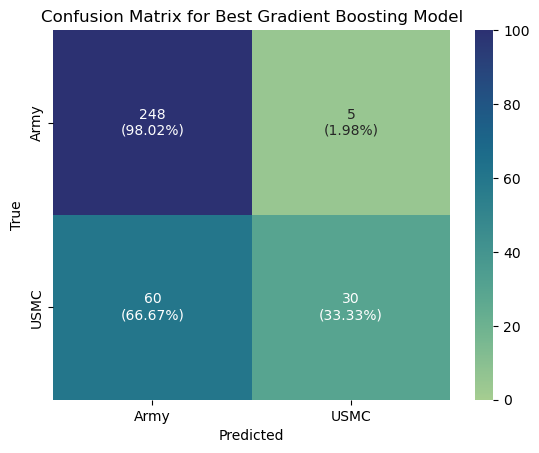

In [ ]:
# Print best parameters
print("Best Parameters for Gradient Boosting:")
print(pd.Series(grid_search_gb.best_params_))
print()

# Print classification report for the best model
print("Classification Report for Best Gradient Boosting Model:")
print(classification_report(y_test, y_pred_best_gb))

#Export classification report to CSV
report = classification_report(y_test, y_pred_best_gb, output_dict=True)
# Convert the report to a DataFrame
report_df = pd.DataFrame(report)
# Save the DataFrame to a CSV file
report_df.to_csv('../4_CONCLUSIONS_VIZ/files/classification_report_best_gb.csv')



# Confusion matrix calculation
cm_gb = confusion_matrix(y_test, y_pred_best_gb)

# Convert confusion matrix to percentages
cm_gb_percent = cm_gb / cm_gb.sum(axis=1).reshape(-1,1) * 100

# Create combined matrix with counts and percentages
combined_cm = np.array([["{}\n({:.2f}%)".format(count, percent) for count, percent in zip(row_count, row_percent)] 
                        for row_count, row_percent in zip(cm_gb, cm_gb_percent)]) #REF: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

# Plotting
sns.heatmap(cm_gb, annot=combined_cm, fmt='', cmap='crest', xticklabels=['Army', 'USMC'], yticklabels=['Army', 'USMC'], vmin=0, vmax=100,)
plt.title('Confusion Matrix for Best Gradient Boosting Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show() 

# Summary of Models

In [ ]:
# Variables
today_date = datetime.now().strftime("%Y-%m-%d")

# Check if the CSV file exists
if os.path.exists("./data/model_performance_history_military.csv"):
    # Load the existing DataFrame
    model_comparison_df = pd.read_csv("./data/model_performance_history_military.csv")
else:
    # Initialize a new DataFrame if the file does not exist
    model_comparison_df = pd.DataFrame()

# Capture the best scores and parameters for each model
new_data = {
    "Model": ["Logistic Regression", "Multinomial Naive Bayes", "Random Forest", "KNN", "Gradient Boosting"],
    f"{today_date}_Score": [
        grid_search.best_score_,
        grid_search_mnb.best_score_,
        grid_search_rf.best_score_,
        grid_search_knn.best_score_,
        grid_search_gb.best_score_
    ],
    f"{today_date}_Params": [
        str(grid_search.best_params_),
        str(grid_search_mnb.best_params_),
        str(grid_search_rf.best_params_),
        str(grid_search_knn.best_params_),
        str(grid_search_gb.best_params_)
    ]
}

# Convert new data to DataFrame
new_data_df = pd.DataFrame(new_data)

# Update the existing DataFrame with the new data
model_comparison_df = pd.concat([model_comparison_df, new_data_df], axis=0)

# Sort the DataFrame by the highest best score for the current run
model_comparison_df = model_comparison_df.sort_values(by=f"{today_date}_Score", ascending=False)

# Save the DataFrame to a CSV file
model_comparison_df.to_csv("./data/model_performance_history_military.csv", index=False)

# Display the DataFrame
model_comparison_df


,Model,2024-01-05_Score,2024-01-05_Params,2024-01-06_Score,2024-01-06_Params,2024-01-07_Score,2024-01-07_Params
0,Logistic Regression,NaN,NaN,NaN,NaN,0.813732,"{'C': 0.1, 'class_weight': None, 'max_iter': 1..."
4,Gradient Boosting,NaN,NaN,NaN,NaN,0.807904,"{'learning_rate': 0.1, 'max_depth': 5, 'min_sa..."
1,Multinomial Naive Bayes,NaN,NaN,NaN,NaN,0.807182,"{'alpha': 0.1, 'class_prior': [0.7, 0.3], 'fit..."
2,Random Forest,NaN,NaN,NaN,NaN,0.797669,"{'max_depth': None, 'min_samples_leaf': 1, 'mi..."
3,KNN,NaN,NaN,NaN,NaN,0.742879,"{'metric': 'euclidean', 'n_neighbors': 8, 'wei..."
0,Logistic Regression,NaN,NaN,0.804029,"{'C': 0.1, 'class_weight': None, 'max_iter': 1...",NaN,NaN
1,Multinomial Naive Bayes,NaN,NaN,0.798605,"{'alpha': 0.1, 'class_prior': [0.7, 0.3], 'fit...",NaN,NaN
2,Gradient Boosting,NaN,NaN,0.794732,"{'learning_rate': 0.1, 'max_depth': 4, 'min_sa...",NaN,NaN
3,Random Forest,NaN,NaN,0.787762,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",NaN,NaN
4,KNN,NaN,NaN,0.735087,"{'metric': 'euclidean', 'n_neighbors': 7, 'wei...",NaN,NaN


In [ ]:
# Gather the influencing words for each class
top_words_army = {feature_names[i]: abs(coefficients[i]) for i in sorted_indices[:20]}
top_words_marine = {feature_names[i]: abs(coefficients[i]) for i in sorted_indices[-20:]}
top_words_mnb_army = {feature_names[i]: abs(class_log_probabilities[i]) for i in sorted_indices[:20]}
top_words_mnb_marine = {feature_names[i]: abs(class_log_probabilities[i]) for i in sorted_indices[-20:]}
top_words_rf_army = {feature_names[i]: abs(importances[i]) for i in indices[:20]}
top_words_rf_marine = {feature_names[i]: abs(importances[i]) for i in indices[-20:]}
top_words_gb_army = {feature_names[i]: abs(importances_gb[i]) for i in indices_gb[:20]}
top_words_gb_marine = {feature_names[i]: abs(importances_gb[i]) for i in indices_gb[-20:]}

# Create a list of all unique words from all dictionaries
unique_words = list(set(top_words_army.keys()).union(top_words_marine.keys(),
                   top_words_mnb_army.keys(), top_words_mnb_marine.keys(),
                   top_words_rf_army.keys(), top_words_rf_marine.keys(),
                   top_words_gb_army.keys(), top_words_gb_marine.keys()))

# Initialize a DataFrame with these unique words as the index
top_words_df = pd.DataFrame(index=unique_words)

# Populate the DataFrame with the values from the dictionaries
for model, class_dict in [('Logistic Regression', (top_words_army, top_words_marine)), 
                          ('Multinomial Naive Bayes', (top_words_mnb_army, top_words_mnb_marine)),
                          ('Random Forest', (top_words_rf_army, top_words_rf_marine)),
                          ('Gradient Boosting', (top_words_gb_army, top_words_gb_marine))]:
    for class_label, words_dict in [('Army', class_dict[0]), ('Marine', class_dict[1])]:
        column_name = f'{model}_{class_label}'
        top_words_df[column_name] = top_words_df.index.map(words_dict).fillna(0)

# Display the DataFrame
top_words_df

top_words_df.to_csv('./data/top_words_military.csv', index=True)